In [1]:
import importlib
import os
import torch

import glob
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageChops
from numpy import asarray

import cv2
import numpy as np
import math
import random

import skimage
from skimage import transform
from skimage.io import imread, imshow, imsave


In [2]:
root = "/home/vision/smb-datasets/ecommerce/"

ecommerce = root + "ecommerce_pidinet/"
images_train = root + "images/train/"
images = root + "images/valid/"
sketches = root + "sketches/valid/"
sketches_valid = root + "sketches_valid/"

im = "sueter/55df69d1e383008bc692fc3451aad892.jpg"
sket = "/valid/11.PNG"

#ima = Image.open(ecommerce + im)
#data = asarray(ima)
print(images_train + im)

/home/vision/smb-datasets/ecommerce/images/train/sueter/55df69d1e383008bc692fc3451aad892.jpg


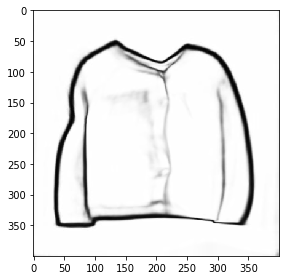

In [43]:
img_original = imread(images_train + im)
img = imread(ecommerce + im)

def liquifyIn(xy, center, strength, curve):
    x, y = xy.T
    x0, y0 = center
    rho = np.sqrt((x - x0) ** 2 + (y - y0) ** 2)
    theta = np.arctan2(y - y0, x - x0)


    rho = rho * (np.exp(-(rho*curve) + np.log(strength)) + 1)


    xy[..., 0] = x0 + rho * np.cos(theta)
    xy[..., 1] = y0 + rho * np.sin(theta)

    return xy

def liquifyOut(xy, center, strength, curve):
    x, y = xy.T
    x0, y0 = center
    rho = np.sqrt((x - x0) ** 2 + (y - y0) ** 2)
    theta = np.arctan2(y - y0, x - x0)


    rho = rho * (-np.exp(-(rho*curve) + np.log(1 - strength)) + 1)


    xy[..., 0] = x0 + rho * np.cos(theta)
    xy[..., 1] = y0 + rho * np.sin(theta)

    return xy



img_warp = img

for i in range(6):

    #func = random.randint(0,1)
    func = 1
    center = (random.randint(50, 350), random.randint(50, 350))
    if func == 1:
        funcion = lambda xy : liquifyIn(xy, center, 2.3, 0.05)
    else:
        funcion = lambda xy : liquifyOut(xy, center, 0.02, 0.05)
    img_warp = transform.warp(img_warp, funcion, mode='edge')

imshow(img_warp)


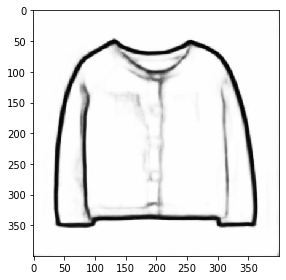

In [30]:
imshow(img)

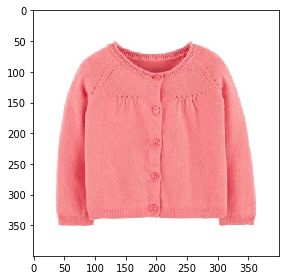

In [10]:
imshow(img_original)

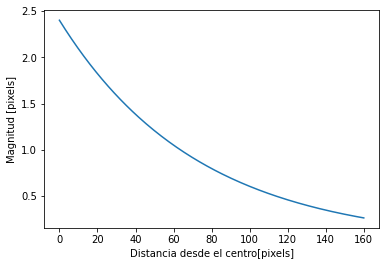

In [10]:

x = np.linspace(0,160, num=201)
y =  [ 80 * (np.exp(-((i/80)*1.1) + np.log(0.03))) for i in x]

plt.xlabel("Distancia desde el centro[pixels]")
plt.ylabel("Magnitud [pixels]")

plt.plot(x,y)

/tmp/ipykernel_351453/203889932.py:2: RuntimeWarning: invalid value encountered in log
  y = [ (- np.exp(-(i*0.05) + np.log(1 - 2.3)) + 1) for i in x]


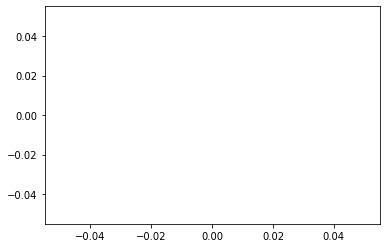

In [8]:
x = np.linspace(0,200, num=201)
y = [ (- np.exp(-(i*0.05) + np.log(1 - 2.3)) + 1) for i in x]


plt.plot(x,y)

In [5]:
sketch_root_dir = '/home/vision/smb-datasets/ecommerce/ecommerce_pidinet/'
save = '/users/btorres/databases/ecommerce/pidinet_liquify3/'


o = 0
for class_path in glob.glob(os.path.join(sketch_root_dir, '**')):
    class_name = os.path.basename(class_path)

    #newpath = save + class_name
    #if not os.path.exists(newpath):
    #    os.makedirs(newpath)


    for sketch_path in glob.iglob(os.path.join(class_path, '**')):
        image_name = os.path.basename(sketch_path)

        sketch = imread(sketch_path)
        img_warp = sketch

        for i in range(5):
            func = random.randint(0,1)
            center = (random.randint(100, 300), random.randint(100, 300))
            if func == 1:
                funcion = lambda xy : liquifyIn(xy, center, 2.0, 0.05)
            else:
                funcion = lambda xy : liquifyOut(xy, center, 0.02, 0.05)
            img_warp = transform.warp(img_warp, funcion)

        save_path = save + class_name + "/" + image_name.split(".")[-2] + ".jpg"

        img_warp = img_warp / img_warp.max() #normalizes img_grey in range 0 - 255
        img_warp = 255 * img_warp
        img_warp = img_warp.astype(np.uint8)

        imsave(save_path, img_warp)


        o += 1
        if(o % 1000 == 0):
            print(str(o) + " imágenes procesadas")



1000 imágenes procesadas
2000 imágenes procesadas
3000 imágenes procesadas
4000 imágenes procesadas
5000 imágenes procesadas
6000 imágenes procesadas
7000 imágenes procesadas
8000 imágenes procesadas
9000 imágenes procesadas
10000 imágenes procesadas
11000 imágenes procesadas
12000 imágenes procesadas
13000 imágenes procesadas
14000 imágenes procesadas
15000 imágenes procesadas
16000 imágenes procesadas
17000 imágenes procesadas
18000 imágenes procesadas
19000 imágenes procesadas
20000 imágenes procesadas
21000 imágenes procesadas
22000 imágenes procesadas
23000 imágenes procesadas
24000 imágenes procesadas
25000 imágenes procesadas
26000 imágenes procesadas
27000 imágenes procesadas
28000 imágenes procesadas
29000 imágenes procesadas
30000 imágenes procesadas
31000 imágenes procesadas
32000 imágenes procesadas
33000 imágenes procesadas
34000 imágenes procesadas
35000 imágenes procesadas
36000 imágenes procesadas
37000 imágenes procesadas
38000 imágenes procesadas
39000 imágenes proces